<a href="https://colab.research.google.com/github/sgami444/Human-Activity-Recognition-using-Smartphones/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title: Human Activity Recognition using Smartphones**




#**Introduction**

Human activity recognition has wide applications in medical research and human survey system. Smartphones, smartwatches, fitness trackers, and ad-hoc wearable devices are being increasingly used to monitor human activities. Data acquired by the hosted sensors are usually processed by machine-learning-based algorithms to classify human activities. 





#**Description of Dataset**

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, the dataset has 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


#**Attribute information**

For each record in the dataset the following is provided:


1. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

2. Triaxial Angular velocity from the gyroscope.



3. A 561-feature vector with time and frequency domain variables.

4. Its activity label.

5. An identifier of the subject who carried out the experiment.

#**Dataset Source:**

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

#**Importing Libraries**

We import numpy and pandas for managing arrays and dataset. 
Then, matplotlib is included to be used to create visualisations. 

To use various machine learning algorithms, we imported DecisionTreeClassifier, Logistic Regression, and Random Forest Classifier from sklearn. 

Also, included is accuracy_score to calculate accuracy.

To calculate the runtime for different machine learning algorithms, we import the timeit library. This helps us in analyzing the different kinds of feature selection techniques that we implemented.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import timeit
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn import tree

In [ ]:
mesh_step_size = 0.02

# Before executing the code please download the dataset from the link - 
https://drive.google.com/drive/folders/1YSxdiOMt5P9D7vf7Df5SHDaJZ5AHm13T?usp=sharing
And update the path for for the data accordingly

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

#**Dataset Source:**

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Visualization**
We will now visualise the training data to get a better understanding of the available dataset.

In [ ]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

We check if there are null values in the training and test data set.

In [ ]:
print("Null values present in training data: {}".format(train.isnull().values.any()))
print("Null values present in testing data: {}".format(test.isnull().values.any()))


Null values present in training data: False
Null values present in testing data: False


In [ ]:
train.shape

(7352, 563)

In [ ]:
# Get X and y for training data
X_train = train.drop(columns = ['Activity', 'subject'])
y_train = train["Activity"]


Different categories of activities classified in the dataset

In [ ]:
set(train.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

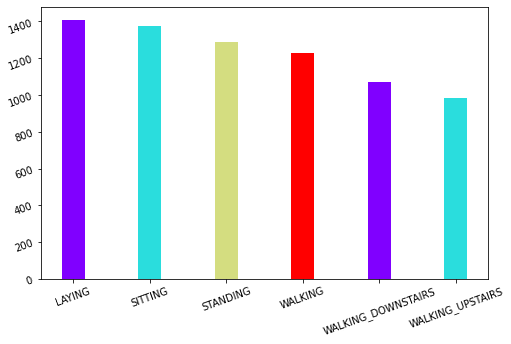

In [ ]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(8,5))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=20,fontsize=10)
plt.yticks(rotation=20,fontsize=10)

 We can see that data size for each activity is equally distributed.

#**Tree-based feature selection** 
(First feature selection method implemented)

Tree-based estimators are used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the SelectFromModel meta-transformer)

In [ ]:
features = train.iloc[:,0:562]
label = train['Activity']
classifier = ExtraTreesClassifier()
classifier = classifier.fit(features, label)
treeclassifer_model = SelectFromModel(classifier, prefit=True)
New_features = treeclassifer_model.transform(features)
print(New_features.shape)

(7352, 161)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



#**L1-Based feature selection**

L1 regularization adds a penalty to the loss function (L1-norm). Since each non-zero coefficient adds to the penalty, it forces weak features to have zero as coefficients. Thus L1 regularization produces sparse solutions, inherently performing feature selection.

They can be used along with SelectFromModel and with LinearSVC for classification.

In [ ]:
linearsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
svc_model = SelectFromModel(linearsvc, prefit=True)
New_features_2 = svc_model.transform(features)
print(New_features_2.shape)

(7352, 110)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



We observe that L1-based feature selection reduced the dimension of the dataset more than the Tree-based feature selection. 

Now, we start implementing machine learning algorithms over three different modified datasets namely : **1)n 

1.    Without Feature selection
2.    With Tree-based feature selection
3.    With L1-based feature selection


#**Fitting Classifiers**

Loading the models

To begin, I'll use various machine learning algorithms available inside the sklearn package that I have already imported. For each algorithm, I'll calculate the accuracy and identify the most accurate algorithm

In [ ]:
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200), LogisticRegression(random_state = 0)]

1. Training, Testing and Evaluating the three ML algorithms: DecisionTreeClassifier, RandomForestClassifier and LogisticRegression WITHOUT any feature selection

We also implement the timer inorder to calculate the running time of each of three ML algorithms for each of the three cases

In [ ]:
test_features= test.iloc[:,0:562]
no_feat_time=[]
no_feat_model=[]
no_feat_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    no_feat_time.append(elapsed)
    no_feat_model.append(classifier.__class__.__name__)
    no_feat_accuracy.append(accuracy_score(test['Activity'],pred))
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



2. Training, Testing and Evaluating the three ML algorithms with dataset obtained after implementing Tree-based feature selection


In [ ]:
test_features= treeclassifer_model.transform(test.iloc[:,0:562])
tree_time=[]
tree_model=[]
tree_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    tree_time.append(elapsed)
    tree_model.append(classifier.__class__.__name__)
    tree_accuracy.append(accuracy_score(test['Activity'],pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



3. Training, Testing and Evaluating the three ML algorithms with dataset obtained after implementing L1-based feature selection


In [ ]:
test_features= svc_model.transform(test.iloc[:,0:562])
svc_time=[]
svc_model_init=[]
svc_accuracy=[]
for classifier in Classifiers:
    start_time = timeit.default_timer()
    fit=classifier.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    svc_time.append(elapsed)
    svc_model_init.append(classifier.__class__.__name__)
    svc_accuracy.append(accuracy_score(test['Activity'],pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#**Accuracy**

We plot the accuracy for each of the three models for the different types of feature selection

Accuracy without Feature selection - 
[0.8642687478791992, 0.9246691550729556, 0.9524940617577197]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Accuracy with Tree based feature selection -  
[0.8489989820156091, 0.9121140142517815, 0.9477434679334917]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Accuracy with L1-based feature selection - 
[0.8561248727519511, 0.9107567017305734, 0.9518154054971157]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]



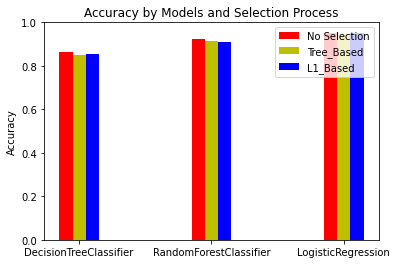

In [ ]:
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, no_feat_accuracy, width, color='r')
rects2 = ax.bar(ind + width, tree_accuracy, width, color='y')
rects3 = ax.bar(ind + width + width ,svc_accuracy, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(svc_model_init,rotation=0)
ax.legend((rects1[0], rects2[0], rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
print("Accuracy without Feature selection - ")
print(no_feat_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Accuracy with Tree based feature selection -  ")
print(tree_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Accuracy with L1-based feature selection - ")
print(svc_accuracy)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")


plt.show()

#**Running Time**

We plot the running time for each of the three models for the different types of feature selection

Running Time without Feature selection - 
[5.379408539999986, 25.39565224800026, 3.705062046999956]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Running Time with Tree based feature selection -  
[1.4733541800001149, 12.516295610999805, 1.5546306299997923]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]

Running Time with L1-based feature selection - 
[1.0533842499999082, 10.44622219799976, 1.2134166069999992]
[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]



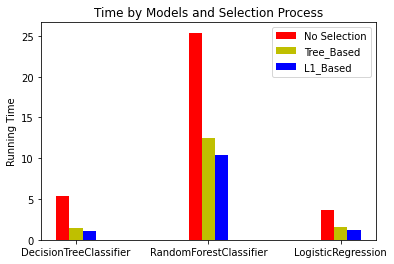

In [ ]:
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, no_feat_time, width, color='r')
rects2 = ax.bar(ind + width, tree_time, width, color='y')
rects3 = ax.bar(ind + width + width ,svc_time, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(svc_model_init,rotation=0)
ax.legend((rects1[0], rects2[0], rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
print("Running Time without Feature selection - ")
print(no_feat_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Running Time with Tree based feature selection -  ")
print(tree_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")

print("Running Time with L1-based feature selection - ")
print(svc_time)
print("[DecisionTreeClassifier RandomForestClassifier LogisticRegressionClassifier]\n")
plt.show()

Conclusion

The feature selection can hugely decrease the running time of complicated model, without obviously jeopardizing the performance of model.

The overall accuracy of the model will not be necessarily compromised by shrinking the size of the data set. The main reason is that good feature selection may prevent over-fitting to some extents.



In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

#What we are doing

We will apply different classification algorithms and see the accuracy of each algorithm and we will also see how it holds up and appears in low dimensions

In [ ]:
train_label = train_data.Activity
test_label = test_data.Activity

In [ ]:
X_train = train_data.drop('Activity', axis = 1)
X_test = test_data.drop('Activity', axis = 1)

In [ ]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, train_label)

In [ ]:
# tree.plot_tree(decision_tree)

Saving the decision tree that was created as a pdf for better visibility

In [ ]:
import graphviz

In [ ]:
point_data = tree.export_graphviz(decision_tree, out_file = None)
graph_plot = graphviz.Source(point_data)
graph_plot.render("Activities")

'Activities.pdf'

The pdf 'Activities.pdf' is available in the left panel now, double click to download the pdf and open to view the decision tree and its parameters

#Performing PCA on the data

The data right now can be difficult to visualise with 500+ attributes/features in it, so we used PCA to bring down the dimenions of the dataset from 500+ features to just 3 features, with new feature names 'PC 1', 'PC 2', and 'PC 3' so that we can visulaise the data in 3 dimensional space

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
components = pca.fit_transform(X_train)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(components, x = 0, y = 1, z = 2, color = train_label, labels = {'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

##Why different data lines?
The reason the above dataset looks distributed is because the data has an attribute names subject that has 30 distinct values based on the 30 different people that participated in the experiment, so each distinct group of data is data of a specific person

##Generalisation
We removed the attribute 'Subject' from the dataset to generalise the dataset for all the people that contributed in the experiment to get a generalised plotting of the dataset, the same generalised dataset will be used later for clustering so that it can be applied to unseen data and unseen subject too

In [ ]:
X_no_sub = X_train.drop('subject', axis=1)

In [ ]:
pca_no_sub = PCA(n_components=3)
components_no_sub = pca_no_sub.fit_transform(X_no_sub)

In [ ]:
fig = px.scatter_3d(components_no_sub, x = 0, y = 1, z = 2, color = train_label, labels = {'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

##But I can already see the different clusters

The colors seen above is just for better visualisation of how the ditribution of data is, the clustering algorithm will just see all the datapoints as same color and the algorithm clusters the datsets - as shown below

In [ ]:
fig = px.scatter_3d(components_no_sub, x = 0, y = 1, z = 2, labels = {'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

#K-Means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
cluster_model = KMeans(n_clusters = 6)
cluster_model.fit(components_no_sub)

KMeans(n_clusters=6)

In [ ]:
labels = cluster_model.predict(components_no_sub)

In [ ]:
fig = px.scatter_3d(components_no_sub, x = 0, y = 1, z = 2, color = labels, labels = {'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

##Why K-Means?
We tried different clustering algorithms like DBSCAN, weighted K-means, Gaussian Mixture model but they were computationally heavy and didn't give expected results, the distribution of K-Means showed us the closest clusters visually

In [ ]:
compare_label = []
compare_label.append(labels[0])
for i in range(1, len(labels)):
  if labels[i]==labels[0]:
    compare_label.append('SITTING')
  if labels[i]==labels[100]:
    compare_label.append('WALKING')
  if labels[i]==labels[55]:
    compare_label.append('LAYING')
  if labels[i]==labels[130]:
    compare_label.append('WALKING_DOWNSTAIRS')
  if labels[i]==labels[14]:
    compare_label.append('STANDING')
  if labels[i]==labels[-1]:
    compare_label.append('WALKING_UPSTAIRS')

In [ ]:
correct = 0
for i in range(len(compare_label)):
  if compare_label[i]==train_label[i]:
    correct = correct+1
accuracy = (correct/len(compare_label))*100

In [ ]:
print(accuracy)

58.71871599564744
